## Guided Project: Clean And Analyze Employee Exit Surveys
Practice data cleaning using Pandas

In this project, we'll clean and analyze exit surveys from employees of the Department of Education, Training and Employment (DETE)) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. The TAFE exit survey can be found here and the survey for the DETE can be found here.

We'll pretend our stakeholders want us to combine the results for both surveys to answer the following question:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

### Introduction

In [1]:
import pandas as pd

In [2]:
date_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [3]:
date_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe_survey = pd.read_csv('tafe_survey.csv')

In [6]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
date_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

- We can see that there are some column on both dataset do not give us any relevant answers.
- dissatisfaction is one of the importat reason of leaving jobs.

## Identify Missing Values and Drop Unnecessary Columns

We going to remove the columns that are unnecessary.

In [18]:
date_survey.shape

(822, 56)

In [19]:
tafe_survey.shape

(702, 72)

In [20]:
date_survey_updated = date_survey.drop(date_survey.columns[28:49], axis=1)

In [21]:
date_survey_updated.shape

(822, 35)

In [25]:
date_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [33]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Clean column names

In [34]:
date_survey_updated.columns = date_survey_updated.columns.str.lower().str.replace(" ","_")

In [35]:
date_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [36]:
date_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [37]:
tafe_survey_updated = tafe_survey_updated.rename(columns = {'Record ID': 'id','CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
                           'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 
                           'Employment Type. Employment Type': 'employment_status', 
                           'Classification. Classification': 'position',
                           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'})

In [38]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

## Data filtration and varification

In [39]:
date_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [40]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [41]:
dete_resignations = date_survey_updated.copy()

In [42]:
tafe_resignations = tafe_survey_updated.copy()

let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

If you're interested in a challenge, try to complete the project using all of the separation types instead - you'll find more issues to work through in the data cleaning process.

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

Remember that we'll have to account for each of these variations so we don't unintentionally drop data!

In this step, note that you may see what is known as a SettingWithCopy Warning. This won't prevent your code from running properly but it's just letting you know that whatever operation you're doing is trying to be set on a copy of a slice from a dataframe. We'll include instructions below to get around this.

# Next Step

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). When you're working with real world data, don't assume that the data you're analyzing isn't corrupted in some way!

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. However, we encourage you to check the data for other issues as well!

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [258]:
# dete_resignations['cease_date']

In [265]:
import re
patt = r'([1-2][0-9]{3})'
dete_resignations['cease_date'].str.strip().str.extractall(patt).astype(float)

,,0
,match,
0,0,2012.0
1,0,2012.0
2,0,2012.0
3,0,2012.0
4,0,2012.0
5,0,2012.0
6,0,2012.0
7,0,2012.0
8,0,2012.0


In [266]:
tafe_resignations['cease_date'].value_counts()

2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: cease_date, dtype: int64

In [267]:
tafe_resignations['cease_date'].sort_index(ascending=True)

0      2010.0
1      2010.0
2      2010.0
3      2010.0
4      2010.0
5      2010.0
6      2010.0
7      2010.0
8      2009.0
9      2010.0
10     2010.0
11     2010.0
12     2010.0
13     2010.0
14     2010.0
15     2010.0
16     2010.0
17     2010.0
18     2010.0
19     2010.0
20     2010.0
21     2010.0
22     2010.0
23     2010.0
24     2010.0
25     2010.0
26     2010.0
27     2010.0
28     2010.0
29     2010.0
        ...  
672    2013.0
673    2013.0
674    2013.0
675    2013.0
676    2013.0
677    2013.0
678    2013.0
679    2013.0
680    2013.0
681    2013.0
682    2013.0
683    2013.0
684    2013.0
685    2013.0
686    2013.0
687    2013.0
688    2013.0
689    2013.0
690    2013.0
691    2013.0
692    2013.0
693    2013.0
694    2013.0
695    2013.0
696    2013.0
697    2013.0
698    2013.0
699    2013.0
700    2013.0
701    2013.0
Name: cease_date, Length: 702, dtype: float64

KeyError: "['cease_date'] not in index"

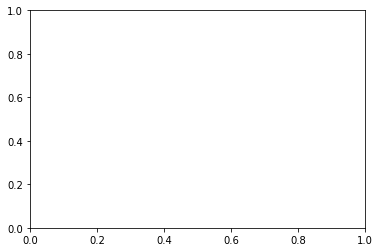

In [273]:
dete_resignations.boxplot(column=['cease_date'])